A simpler intro to vectors and their operations

In [28]:
import numpy as np
# Numpy and scipy are some libraries that are powerful tools to deal with vectors.

# Create two vectors
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# Vector addition
c = a + b
print("a + b =", c)

# Vector subtraction
d = a - b
print("a - b =", d)

# Scalar multiplication
e = 2 * a
print("2 * a =", e)

# Dot product
f = np.dot(a, b)
print("a . b =", f)

# Cross product (for 3-dimensional vectors only)
g = np.cross(a, b)
print("a x b =", g)


a + b = [5 7 9]
a - b = [-3 -3 -3]
2 * a = [2 4 6]
a . b = 32
a x b = [-3  6 -3]


Now taking one step ahead and dealing with an application to show off the usage of the vector operations.

In [29]:
from PIL import Image

# Load the image
img = Image.open("example.jpg")

# Resize the image
img = img.resize((400, 400))

# Convert the image to grayscale
img = img.convert('L')

# Save the modified image
img.save("example_processed.jpg")
img.show()


 first load an image called "example.jpg" using the Image.open() function from the Pillow library. We then resize the image to 400 x 400 pixels using the resize() method of the Image object. Next, we convert the image to grayscale using the convert() method with the 'L' parameter.
 and then the image is saved in the current directory as "example_processed.jpg".

In [30]:
import cv2

# Load the image in grayscale
img = cv2.imread('example.jpg', 0)

# Apply a Gaussian filter to the image
img_filtered = cv2.GaussianBlur(img, (5, 5), 0)


# Apply Canny edge detection to the image
edges = cv2.Canny(img_filtered, 50, 150)

# Save the processed image
cv2.imwrite('example_processed.jpg', edges)


True

In this example, we first load an image called "example.jpg" using the cv2.imread() function with 0 as the second parameter to read the image in grayscale.

Next, we apply a Gaussian filter to the image using the cv2.GaussianBlur() function. The second parameter (5, 5) specifies the kernel size, and the third parameter 0 specifies the standard deviation of the Gaussian kernel.

After filtering the image, we apply Canny edge detection to the filtered image using the cv2.Canny() function. The second and third parameters control the thresholds for the edge detection.
Edge detection is a process of identifying the boundaries or edges between two different regions in an image.

vector usage in the above code:
In the code img_filtered = cv2.GaussianBlur(img, (5, 5), 0), the (5, 5) argument is a vector that specifies the kernel size of the Gaussian filter. It represents a 2D vector with the width and height of the kernel. Similarly, in the code edges = cv2.Canny(img_filtered, 50, 150), the 50 and 150 arguments are thresholds that are used to detect edges in the image. They represent scalar values that are used to compare the intensity values of adjacent pixels in the image.

Finally, we save the resulting image as "example_processed.jpg" using the cv2.imwrite() function.

*Now moving on to the next application like machine learning.*

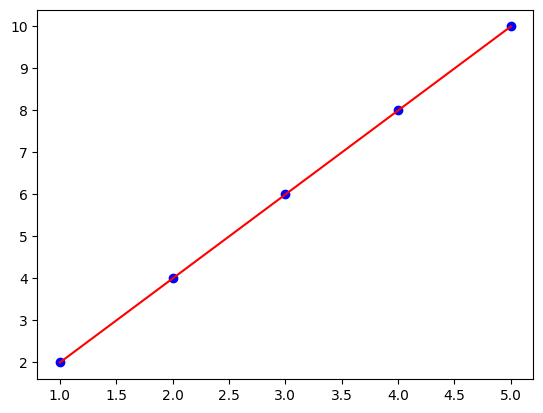

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

# Reshape X to a 2D array
X = X.reshape(-1, 1)

# Define a function to perform linear regression using vectors
def linear_regression(X, y):
    X_b = np.c_[np.ones((len(X), 1)), X]  # Add a column of 1s to X for the bias term
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  # Calculate the optimal parameters
    return theta

# Perform linear regression and plot the results
theta = linear_regression(X, y)
plt.plot(X, y, 'bo')
plt.plot(X, theta[0] + theta[1]*X, 'r-')
plt.show()


we use numpy to create 1-dimensional arrays for our input features X and target variable y. We then reshape X to a 2D array, as required by numpy's linear algebra functions.

We define a function linear_regression which takes in X and y, and uses numpy's linear algebra functions to calculate the optimal parameters for a linear regression model. We add a column of 1s to X to represent the bias term, and use the normal equation to solve for the optimal parameters.

Finally, we plot the data points and the linear regression line using matplotlib. The parameters theta are used to plot the line theta[0] + theta[1]*X.

In [32]:
import numpy as np
import pandas as pd

# Load the data as a pandas dataframe
df = pd.read_csv('FuelConsumptionCo2.csv')

# Extract a column as a vector
x = df['CO2EMISSIONS'].to_numpy()

# Calculate the mean of the vector
mean = np.mean(x)
print(mean)

# Calculate the standard deviation of the vector
std = np.std(x)
print(std)

# Normalize the vector using z-score normalization
x_norm = (x - mean) / std
print(x_norm)

# Perform element-wise multiplication of two vectors
y = np.array([1, 2, 3])
z = np.array([4, 5, 6])
result = y * z
print(result)

# Calculate the dot product of two vectors
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
dot_product = np.dot(a, b)
print(dot_product)

# Calculate the cross product of two vectors
c = np.array([1, 0, 0])
d = np.array([0, 1, 0])
cross_product = np.cross(c, d)
print(cross_product)


256.2286785379569
63.34260099404252
[-0.95084    -0.55616091 -1.89806981 ...  0.23319727  0.05953847
  0.59630203]
[ 4 10 18]
32
[0 0 1]


here we have calculated the properties of the vectors like the mean and the standard deviation, elementwise mulitplication, dot product and cross product for a chosen set of vectors.

*physics simulation is another application of vectors*

In [33]:
import numpy as np

# Define gravitational constant
G = 6.67e-11

# Define particles
sun = {'mass': 1.989e30, 'position': np.array([0, 0, 0]), 'velocity': np.array([0, 0, 0])}
earth = {'mass': 5.97e24, 'position': np.array([1.496e11, 0, 0]), 'velocity': np.array([0, 2.978e4, 0])}

# Define simulation parameters
total_time = 3.154e7
time_step = 86400

# Run simulation
for i in range(int(total_time / time_step)):
    # Calculate gravitational force between particles
    distance = np.sqrt(np.sum((earth['position'] - sun['position']) ** 2))
    force_magnitude = G * earth['mass'] * sun['mass'] / distance ** 2
    force_direction = (sun['position'] - earth['position']) / distance
    force = force_direction * force_magnitude
    
    # Update particle velocities and positions
    earth['velocity'] += force / earth['mass'] * time_step
    earth['position'] += earth['velocity'] * time_step
    print(f"Position at time {i*time_step}: {earth['position']}")
    print(f"Position at time {i*time_step}: {earth['velocity']}")


Position at time 0: [1.49555749e+11 2.57299200e+09 0.00000000e+00]
Position at time 0: [ -512.16650462 29780.             0.        ]
Position at time 86400: [1.49467240e+11 5.14522258e+09 0.00000000e+00]
Position at time 86400: [-1024.40869672 29771.1872658      0.        ]
Position at time 172800: [1.49334480e+11 7.71592987e+09 0.00000000e+00]
Position at time 172800: [-1536.57479996 29753.556589       0.        ]
Position at time 259200: [1.49157488e+11 1.02843518e+10 0.00000000e+00]
Position at time 259200: [-2048.51279142 29727.10537931     0.        ]
Position at time 345600: [1.48936298e+11 1.28497262e+10 0.00000000e+00]
Position at time 345600: [-2560.0704468  29691.83367463     0.        ]
Position at time 432000: [1.48670956e+11 1.54112913e+10 0.00000000e+00]
Position at time 432000: [-3071.09538605 29647.74415025     0.        ]
Position at time 518400: [1.48361520e+11 1.79682857e+10 0.00000000e+00]
Position at time 518400: [-3581.43511929 29594.8421274      0.        ]
Posi

This code simulates the orbit of the Earth around the Sun using the gravitational force equation.

First, the gravitational constant and the particles (Sun and Earth) are defined as dictionaries containing their masses, positions, and velocities as NumPy arrays.

Then, the simulation parameters are defined, including the total time of the simulation and the time step used for updating particle positions and velocities.

The simulation is run using a for loop that iterates over each time step. At each time step, the gravitational force between the particles is calculated using the distance between their positions and the force direction and magnitude equations.

The Earth's velocity and position are then updated based on the force applied to it, and the new positions are printed out at each time step using the f-string format.